In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [5]:
data =  pd.read_csv(r"C:/Users/Aboubakr Ben Bach/Desktop/ML/python/Classification/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df= data.copy()

In [36]:
X = df[["Age","Sex","BP","Cholesterol","Na_to_K"]].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [37]:
y = df['Drug']

In [26]:
(df.isna().sum()/df.shape[0]).sort_values()

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

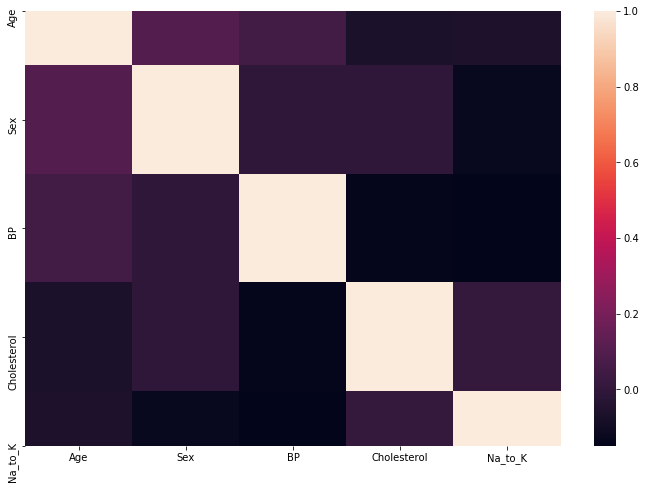

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

##### Convert the categorical to numerical value

In [ ]:
#transform sex
df_sex = preprocessing.LabelEncoder()
df_sex.fit(['F', 'M'])
df['Sex'] =df_sex.transform(df['Sex'])
df['Sex']=df['Sex']

#transform BP
df_bp = preprocessing.LabelEncoder()
df_bp.fit(['HIGH', 'LOW', 'NORMAL'])
df['BP'] =df_bp.transform(df['BP'])
df['BP']=df['BP']
#transform Cholesterol
df_chol = preprocessing.LabelEncoder()
df_chol.fit(['HIGH', 'NORMAL'])
df['Cholesterol'] =df_chol.transform(df['Cholesterol'])


In [33]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


#### train split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

## Model decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier


In [40]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
print("le score:", model.score(X_train, y_train) )

le score: 1.0


In [43]:
y_pred= model.predict(X_test)

In [46]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score,accuracy_score

print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

DecisionTrees's Accuracy:  1.0
[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14
       drugY       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [47]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [72]:
features = df.columns[0:5]
# Export as dot file
tree.export_graphviz(model, out_file='treeeeee.dot', 
                feature_names = features,
                class_names = np.unique(y_train),
                rounded = True,
                 filled = True)


In [73]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'treeeeee.dot', '-o', 'tree_DT.png', '-Gdpi=600'])


0

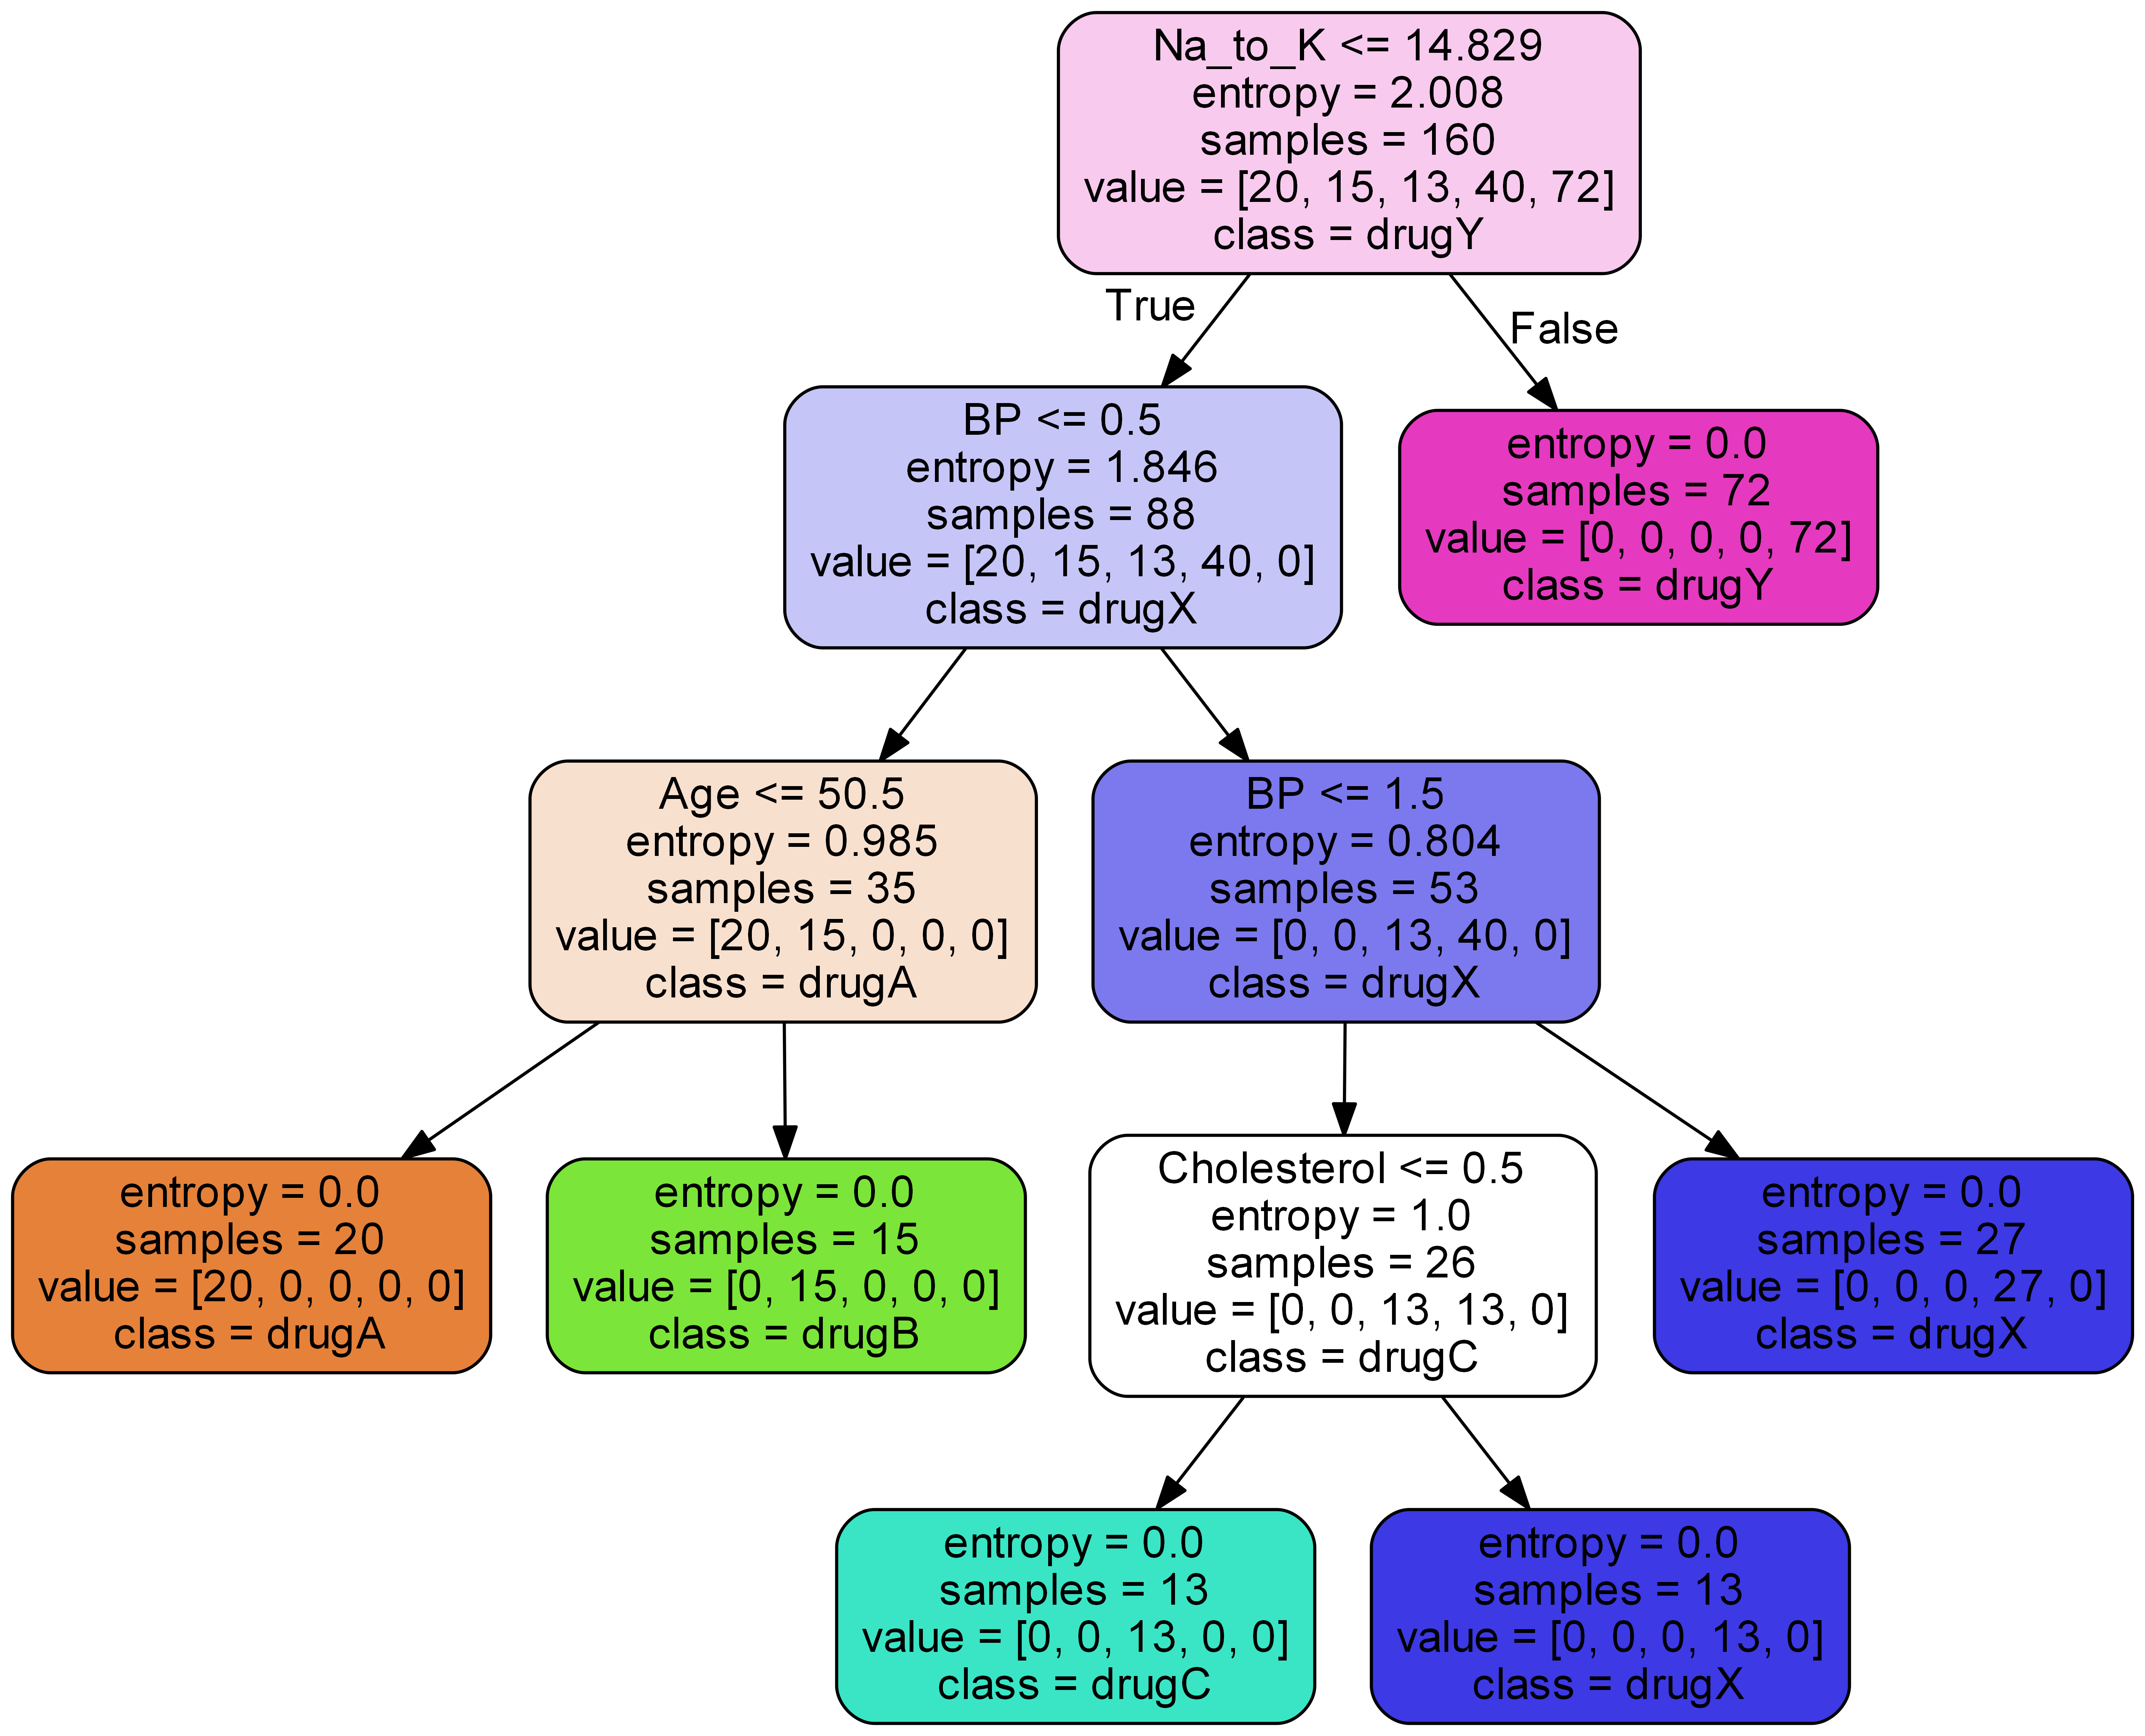

In [74]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_DT.png')